In [72]:
!pip install -r requirements.txt

In [73]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
from public_tests import *
%matplotlib inline

import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

#### Problem statement

Use a neural network to recognize two handwritten digits, zero and one.

In [74]:
# Load the dataset
X, y = load_data()

In [75]:
# View the variables
print('The frist element of X is:', X[0])

The frist element of X is: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

In [76]:
print('The first element of y is:', y[0,0])
print('The last element of y is:', y[-1,0])

The first element of y is: 0
The last element of y is: 1


In [77]:
# Check the dimensions of variables
print('The shape of X is:' + str(X.shape))
print('The shape of y is:' + str(y.shape))

The shape of X is:(1000, 400)
The shape of y is:(1000, 1)


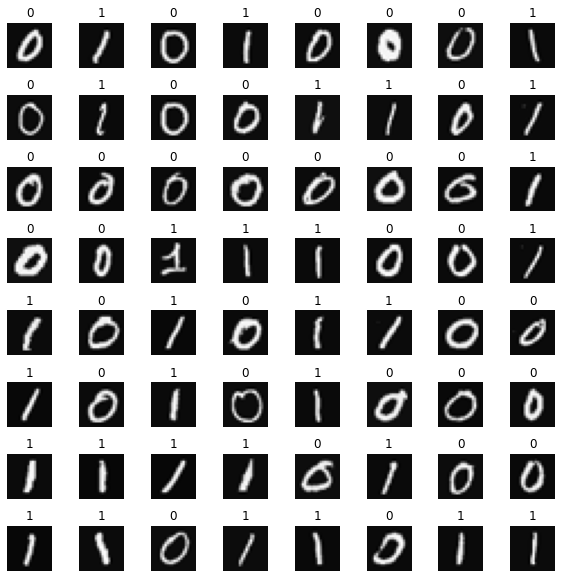

In [78]:
# Visualize the data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    # Select rows corresponding to the random indices and 
    # reshape the iamge
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

#### Tensorflow model implementation

In [79]:
from matplotlib import units


model = Sequential(
    [
        tf.keras.Input(shape=(400,)), 
        tf.keras.layers.Dense(units=25, activation='relu'),
        tf.keras.layers.Dense(units=15, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid'),
    ], name ='my_model'
)

In [80]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 25)                10025     
                                                                 
 dense_10 (Dense)            (None, 15)                390       
                                                                 
 dense_11 (Dense)            (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [81]:
# Further examine the weights to verify the dimensions that tensorflow produced
[layer1, layer2, layer3] = model.layers

W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f'W1 shape = {W1.shape}, b1 shape = {b1.shape}')
print(f'W2 shape = {W2.shape}, b2 shape = {b2.shape}')
print(f'W3 shape = {W3.shape}, b3 shape = {b3.shape}')

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [82]:
# One can also access the weights directly in their tensor form. Check the shape of the tensors in the final layer
print(model.layers[2].weights)

[<tf.Variable 'dense_11/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[-0.50970256],
       [ 0.12222207],
       [-0.45093393],
       [-0.15734145],
       [ 0.4986871 ],
       [ 0.60043746],
       [ 0.3135162 ],
       [ 0.14970618],
       [-0.5079285 ],
       [-0.00177491],
       [ 0.5623254 ],
       [-0.4764508 ],
       [ 0.56956226],
       [ 0.39010602],
       [-0.35172188]], dtype=float32)>, <tf.Variable 'dense_11/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [83]:
# Run gradient descent to fit the weights of the model to the training data
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)
model.fit(X, y, epochs=20)

Epoch 1/20
32/32 [==============================] - 0s 985us/step - loss: 0.2649
Epoch 2/20
32/32 [==============================] - 0s 960us/step - loss: 0.0349
Epoch 3/20
32/32 [==============================] - 0s 918us/step - loss: 0.0159
Epoch 4/20
32/32 [==============================] - 0s 874us/step - loss: 0.0109
Epoch 5/20
32/32 [==============================] - 0s 931us/step - loss: 0.0084
Epoch 6/20
32/32 [==============================] - 0s 935us/step - loss: 0.0070
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 13/20
32/32 [==================

In [84]:
# Make a prediction on an example.
# Noth the input to predict is an array so the single example is reshaped to be two dimensional.
prediction = model.predict(X[0].reshape(1,400))
print(f'predicting a zero: {prediction}')
prediction = model.predict(X[500].reshape(1,400))
print(f'predicting a one: {prediction}')

1/1 [==============================] - 0s 24ms/step
predicting a zero: [[1.7430564e-05]]
1/1 [==============================] - 0s 8ms/step
predicting a one: [[0.9999788]]


The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero. 
In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one.
As in the case of logistic regression, the probability is compared to a threshold to make a final prediction.

In [85]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f'prediction after threshold: {yhat}')

prediction after threshold: 1


1/1 [==============================] - 0s 8ms/step


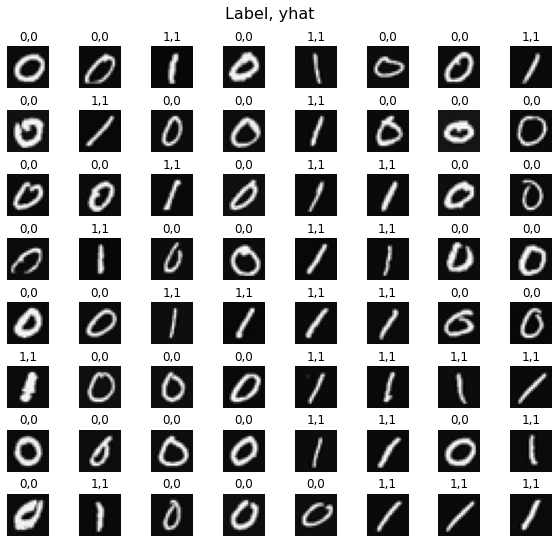

In [86]:
# Compare the predictions vs the labels for a random sample of 64 digits.
from random import random
import warnings

from numpy import ndenumerate
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig,axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((20,20)).T

    ax.imshow(X_random_reshaped, cmap='gray')

    prediction = model.predict(X[random_index].reshape(1, 400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0

    ax.set_title(f'{y[random_index,0]},{yhat}')
    ax.set_axis_off()
fig.suptitle('Label, yhat', fontsize=16)
plt.show()

#### Numpy model implementation(Forward prop in Numpy)

In [87]:
def my_dense(a_in, W, b, g):
    units = W.shape[1]
    a_out = np.zeros(units)

    for j in range(units):
        z = np.dot(W[:,j],a_in) + b[j]
        a_out[j] = g(z)

    return(a_out)

In [88]:
# Build a three-layer neural network utitlizing the my_dense subroutine
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x, W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return(a3)

In [89]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [90]:
# make predictions
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[0,0])
prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[500,0])

yhat =  1  label=  0
yhat =  1  label=  1


1/1 [==============================] - 0s 8ms/step


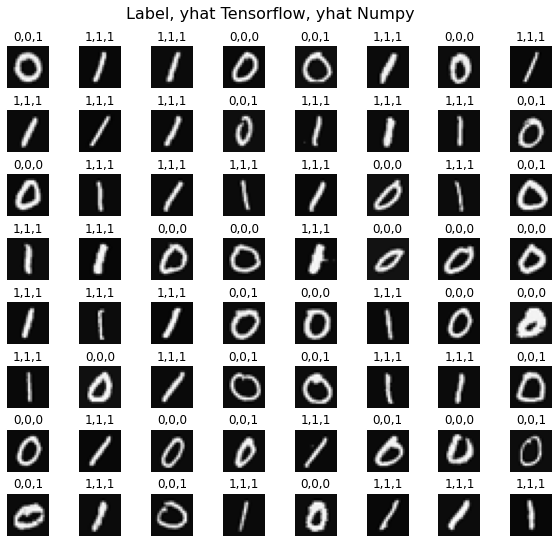

In [91]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network implemented in Numpy
    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    my_yhat = int(my_prediction >= 0.5)

    # Predict using the Neural Network implemented in Tensorflow
    tf_prediction = model.predict(X[random_index].reshape(1,400))
    tf_yhat = int(tf_prediction >= 0.5)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off() 
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()

#### Vectorized Numpy model implementation


In [92]:
x = X[0].reshape(-1,1)
z1 = np.matmul(x.T,W1) + b1
a1 = sigmoid(z1)
print(a1.shape)

(1, 25)


In [94]:
# Compose a new my_dense_v subroutine that performs the layer calculations for a matrix of examples.
def my_dense_v(A_in, W, b, g):
    A_out = np.zeros((A_in.shape[0], W.shape[1]))

    for j in range(W.shape[1]):
        z = np.matmul(A_in,W) + b
        A_out = g(z)

    return (A_out)

In [96]:
# Build a three-layer nerual network
def my_sequential_v(X, W1, b1, W2, b2, W3, b3):
    A1 = my_dense_v(X, W1, b1, sigmoid)
    A2 = my_dense_v(A1, W2, b2, sigmoid)
    A3 = my_dense_v(A2, W3, b3, sigmoid)
    return(A3)

In [97]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [98]:
Prediction = my_sequential_v(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
Prediction.shape

TensorShape([1000, 1])

In [101]:
# Apply a threshold of 0.5
Yhat = (Prediction >= 0.5).numpy().astype(int)
print('predict a zero:', Yhat[0], 'predict a one:', Yhat[500])

predict a zero: [1] predict a one: [1]


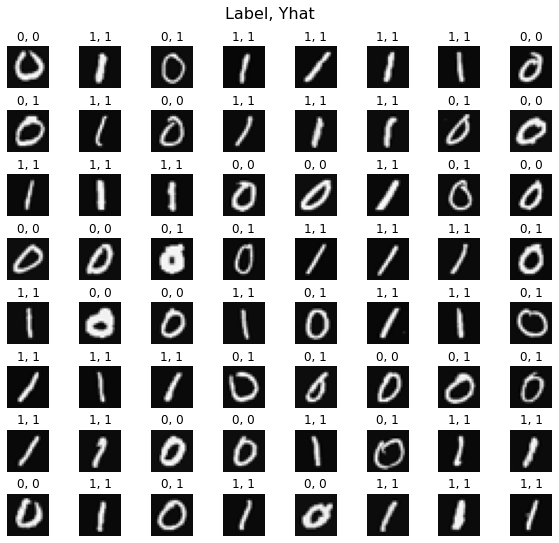

In [102]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m,n = X.shape

fig,axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20,20)).T

    ax.imshow(X_random_reshaped, cmap='gray')

    ax.set_title(f'{y[random_index,0]}, {Yhat[random_index,0]}')
    ax.set_axis_off()
fig.suptitle('Label, Yhat', fontsize=16)
plt.show()

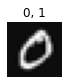

In [103]:
# Check how the misclassified images looks
fig = plt.figure(figsize=(1, 1))
errors = np.where(y != Yhat)
random_index = errors[0][0]
X_random_reshaped = X[random_index].reshape((20, 20)).T
plt.imshow(X_random_reshaped, cmap='gray')
plt.title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
plt.axis('off')
plt.show()